# Seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set_theme(style="whitegrid")

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Basic Data Inspection

In [4]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

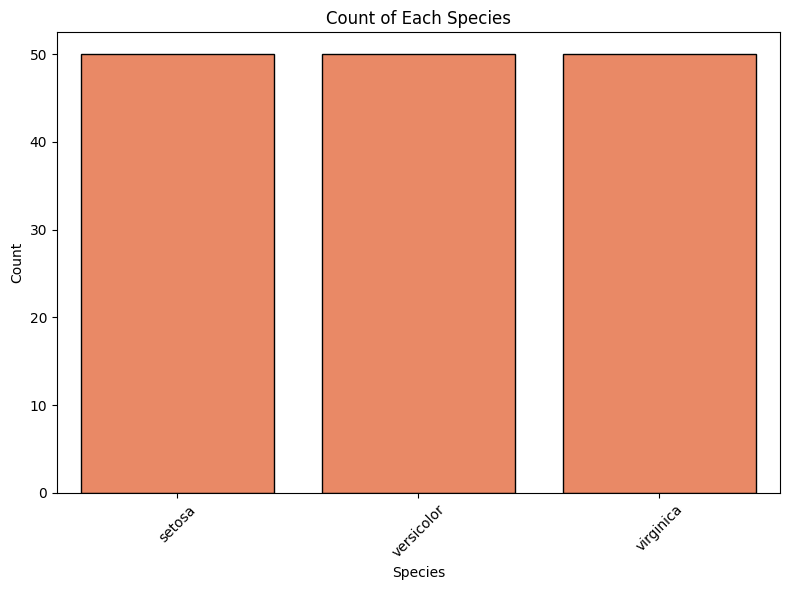

In [5]:
# Bar plot of species counts
plt.figure(figsize=(8, 6))
sns.countplot(data=iris, x="species", color="coral", edgecolor="black", linewidth=1)
plt.title("Count of Each Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

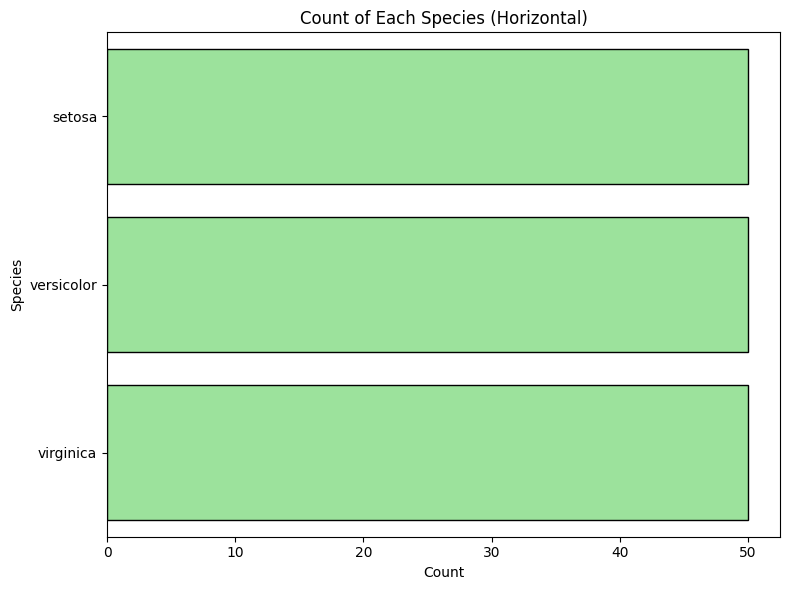

In [6]:
# Horizontal bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=iris, y="species", color="lightgreen", edgecolor="black", linewidth=1)
plt.title("Count of Each Species (Horizontal)")
plt.xlabel("Count")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

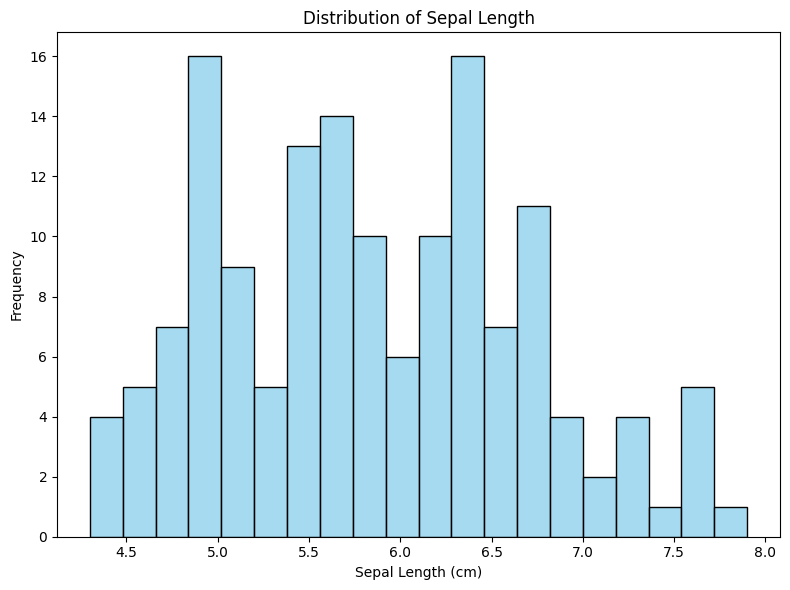

In [7]:
# Plot histogram for a single column
plt.figure(figsize=(8, 6))
sns.histplot(data=iris, x="sepal_length", bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

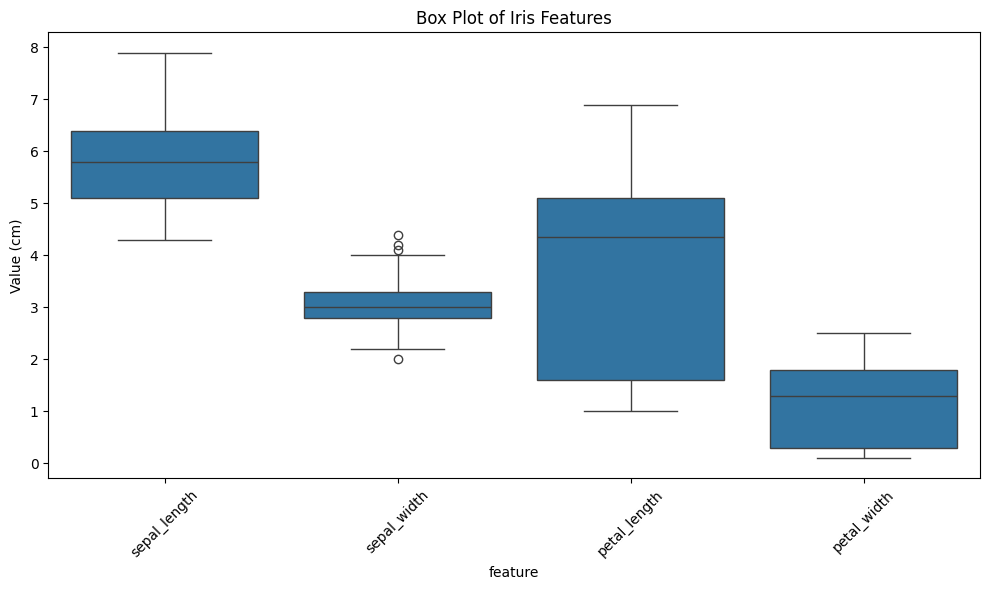

In [8]:
# Box plot for all numeric features
iris_melt = iris.melt(
    value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    var_name="feature",
    value_name="value",
)
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_melt, x="feature", y="value")
plt.title("Box Plot of Iris Features")
plt.ylabel("Value (cm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

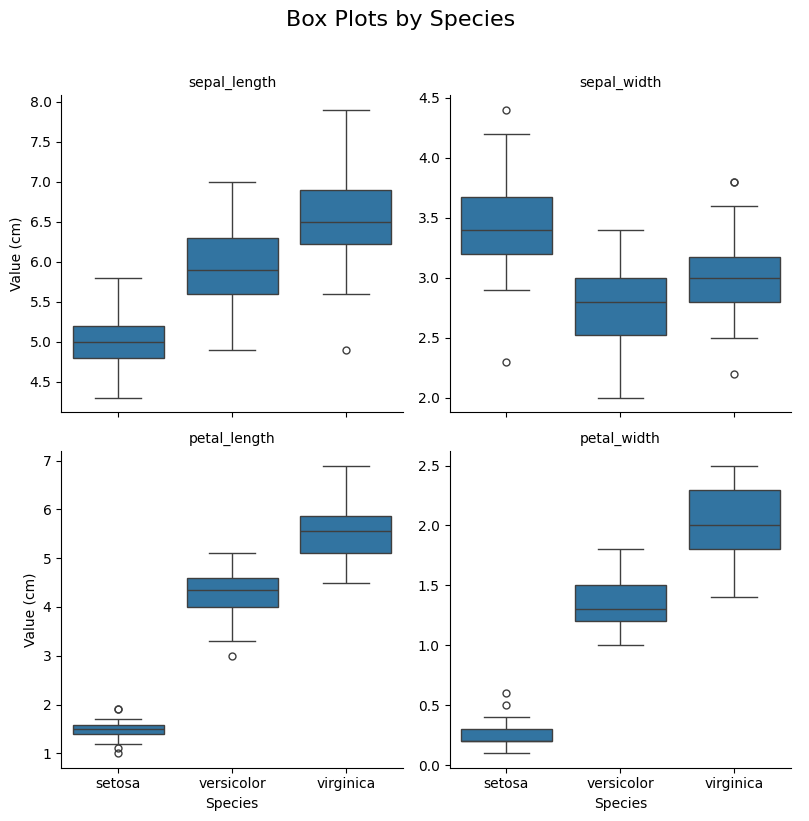

In [9]:
# Box plot by species
iris_melt = iris.melt(
    id_vars="species",
    value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    var_name="feature",
    value_name="value",
)

g = sns.catplot(
    data=iris_melt,
    x="species",
    y="value",
    col="feature",
    kind="box",
    col_wrap=2,
    sharey=False,
    height=4,
    aspect=1,
)

g.set_titles("{col_name}")
g.set_axis_labels("Species", "Value (cm)")
g.fig.suptitle("Box Plots by Species", y=1.02, fontsize=16)
g.fig.tight_layout()
plt.show()

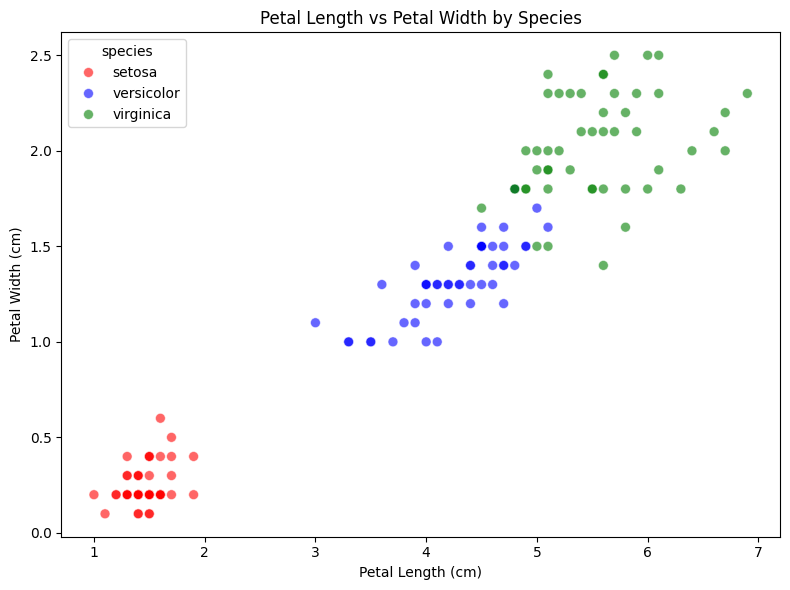

In [10]:
# Scatter plot with color by species
colors = {"setosa": "red", "versicolor": "blue", "virginica": "green"}
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris,
    x="petal_length",
    y="petal_width",
    hue="species",
    palette=colors,
    alpha=0.6,
    s=50,
)
plt.title("Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.tight_layout()
plt.show()

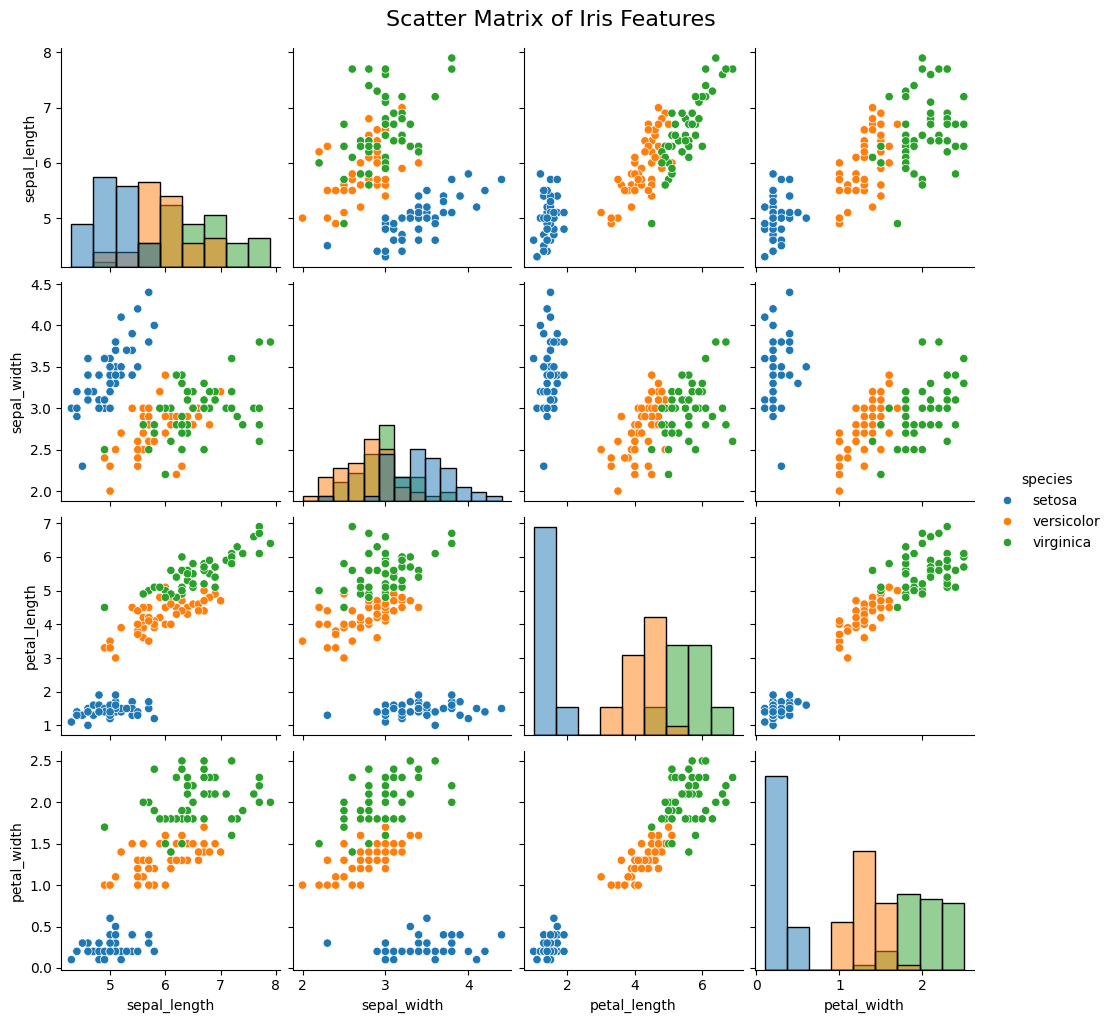

In [11]:
# Scatter matrix to see all pairwise relationships
g = sns.pairplot(
    iris,
    vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    hue="species",
    diag_kind="hist",
    height=2.5,
)

g.fig.suptitle("Scatter Matrix of Iris Features", y=1.02, fontsize=16)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14832\106334746.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


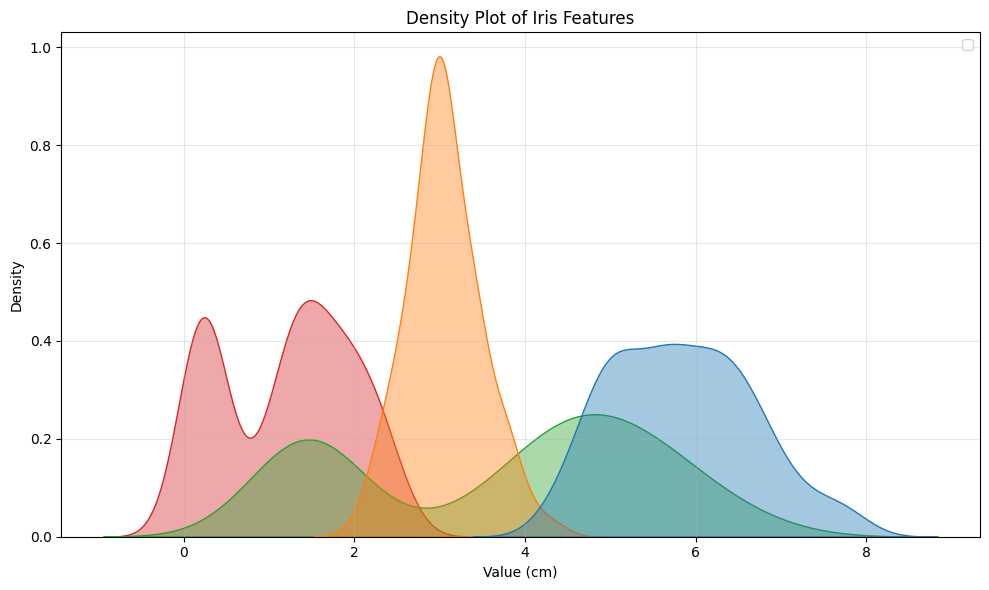

In [12]:
# Density plot for all numeric columns
iris_long = iris.melt(
    value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    var_name="feature",
    value_name="value",
)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=iris_long,
    x="value",
    hue="feature",
    fill=True,
    common_norm=False,
    alpha=0.4,
)
plt.title("Density Plot of Iris Features")
plt.xlabel("Value (cm)")
plt.ylabel("Density")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

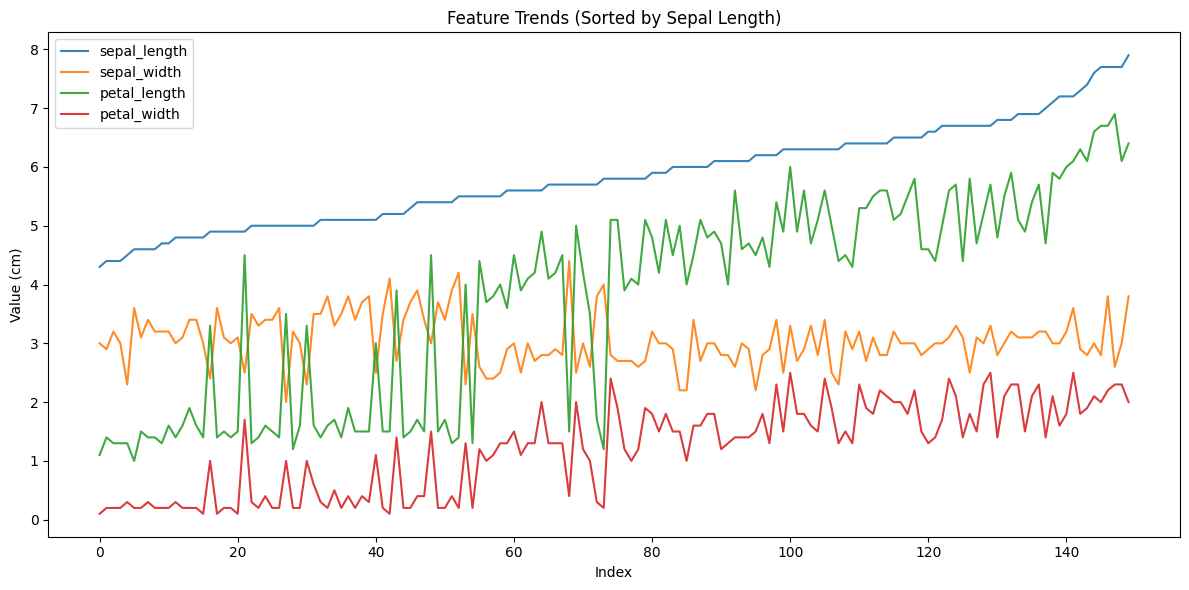

In [13]:
# Line plot (similar to area plot)
iris_sorted = iris.sort_values("sepal_length").reset_index(drop=True)
iris_sorted = iris_sorted.reset_index().rename(columns={"index": "idx"})
iris_long = iris_sorted.melt(
    id_vars="idx",
    value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    var_name="feature",
    value_name="value",
)
plt.figure(figsize=(12, 6))
sns.lineplot(data=iris_long, x="idx", y="value", hue="feature", alpha=0.9)
plt.title("Feature Trends (Sorted by Sepal Length)")
plt.xlabel("Index")
plt.ylabel("Value (cm)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()